# Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Loading the Dataset

In [2]:
data = pd.read_csv('C:/Users/SAYAN/OneDrive/Desktop/Dissertation/Latest _data_set_Kaggel/application_data.csv')
data1 = data.copy() 

In [3]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
summary_data = data.describe(include='all')

print(summary_data)

           SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
uni

In [17]:
# Assuming 'df' is your pandas DataFrame with 122 variables
selected_variables = data.iloc[:, 101:122]  # Select the first 20 variables

summary_selected = selected_variables.describe()

print(summary_selected)


       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
count    307511.000000    307511.000000    307511.000000     307511.000000   
mean          0.000192         0.081376         0.003896          0.000023   
std           0.013850         0.273412         0.062295          0.004771   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         0.000000          0.000000   
75%           0.000000         0.000000         0.000000          0.000000   
max           1.000000         1.000000         1.000000          1.000000   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.003912          0.000007          0.003525          0.002936   
std            0.062424          0.002550          0.0

In [5]:
# The code you provided aims to reduce the memory usage of a DataFrame 'data' by optimizing the data types of its columns.

def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe is {start_mem:.2f} MB")
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                for int_type in [np.int8, np.int16, np.int32, np.int64]:
                    if c_min > np.iinfo(int_type).min and c_max < np.iinfo(int_type).max:
                        df[col] = df[col].astype(int_type)
                        break
            else:
                for float_type in [np.float16, np.float32, np.float64]:
                    if c_min > np.finfo(float_type).min and c_max < np.finfo(float_type).max:
                        df[col] = df[col].astype(float_type)
                        break
        else:
            df[col] = df[col].astype('object')
    
    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage after optimization is: {end_mem:.2f} MB")
    print(f"Decreased by {(100 * (start_mem - end_mem) / start_mem):.1f}%")
    
    return df

data = reduce_mem_usage(data)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


In [6]:
data.dtypes.value_counts()

float16    61
int8       37
object     16
float32     4
int32       2
int16       2
dtype: int64

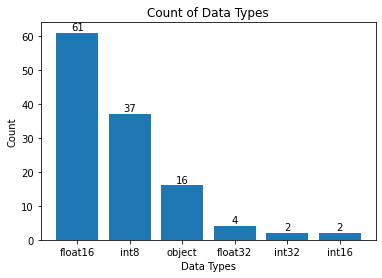

<Figure size 432x288 with 0 Axes>

In [7]:
dtype_counts = data.dtypes.value_counts()

# Create a bar chart with count values on top of bars
plt.bar(dtype_counts.index.astype(str), dtype_counts)
plt.title('Count of Data Types')
plt.xlabel('Data Types')
plt.ylabel('Count')

# Add count values on top of the bars
for i, count in enumerate(dtype_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

plt.savefig('Count_of_data_types.png')

# Exploratory Data Analysis

*****NOTE***** : 
The dataset is quite large with 122 columns and 307510 entries. There are mainly 3 types of datatypes present in the data set (Integer, Float and Object) we will do our further analysis of the dataset on the basis of the datatype.

In [8]:
np.count_nonzero(data.select_dtypes('object').columns)

16

In [9]:
data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [10]:
np.count_nonzero(data.select_dtypes('integer').columns)

41

In [11]:
data.select_dtypes('integer').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [12]:
np.count_nonzero(data1.select_dtypes('float').columns)

65

In [13]:
data1.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [14]:
# get the count, size and Unique value in each column of application data
data.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


In [15]:
#create instance of label encoder for all the categorical variables
lab = LabelEncoder()

"""
'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
"""

#perform label encoding on 'team' column
data['NAME_CONTRACT_TYPE'] = lab.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER'] = lab.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = lab.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = lab.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE'] = lab.fit_transform(data['NAME_TYPE_SUITE'])
data['NAME_INCOME_TYPE'] = lab.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = lab.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = lab.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = lab.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE'] = lab.fit_transform(data['OCCUPATION_TYPE'])
data['WEEKDAY_APPR_PROCESS_START'] = lab.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE'] = lab.fit_transform(data['ORGANIZATION_TYPE'])
data['FONDKAPREMONT_MODE'] = lab.fit_transform(data['FONDKAPREMONT_MODE'])
data['HOUSETYPE_MODE'] = lab.fit_transform(data['HOUSETYPE_MODE'])
data['WALLSMATERIAL_MODE'] = lab.fit_transform(data['WALLSMATERIAL_MODE'])
data['EMERGENCYSTATE_MODE'] = lab.fit_transform(data['EMERGENCYSTATE_MODE'])

In [16]:
data.loc[:,"FLAG_OWN_CAR"]

0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: FLAG_OWN_CAR, Length: 307511, dtype: int32

In [17]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,1,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,0,0,1,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,1,1,0,1,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\SAYAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


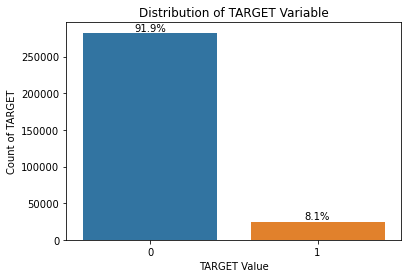

In [18]:
sns.countplot(data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
##plt.show()

total_count = len(data)
ax = plt.gca()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [19]:
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 
                                                                        'Data_Type']).sort_values(by="Percent", ascending=False)

In [20]:
app_meta_data=meta_data(data1)
app_meta_data.head()

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64


In [21]:
defaulters=data1[data1.TARGET==1]

nondefaulters=data1[data1.TARGET==0]

In [22]:
# Creating chart function of the graphs



def plot_charts(var, label_rotation, horizontal_layout):
    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 20))

    total_defaulters = len(defaulters)
    total_nondefaulters = len(nondefaulters)

    s1 = sns.countplot(ax=ax1, x=defaulters[var], data=defaulters, order=defaulters[var].value_counts().index)
    ax1.set_title('Distribution of ' + '%s' % var + ' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' % var)
    ax1.set_ylabel("Count of Loans")
    if label_rotation:
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)

    s2 = sns.countplot(ax=ax2, x=nondefaulters[var], data=nondefaulters, order=nondefaulters[var].value_counts().index)
    if label_rotation:
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
    ax2.set_xlabel('%s' % var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of ' + '%s' % var + ' for Non-Defaulters', fontsize=10)

    # Adding percentage on top of the bar graph
    for ax in [ax1, ax2]:
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / (total_defaulters if ax == ax1 else total_nondefaulters))
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                        fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()


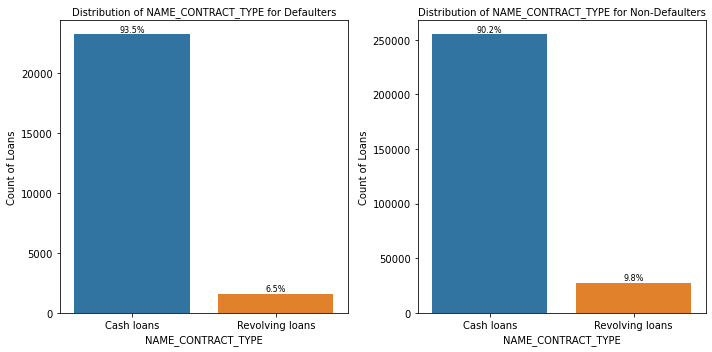

In [23]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

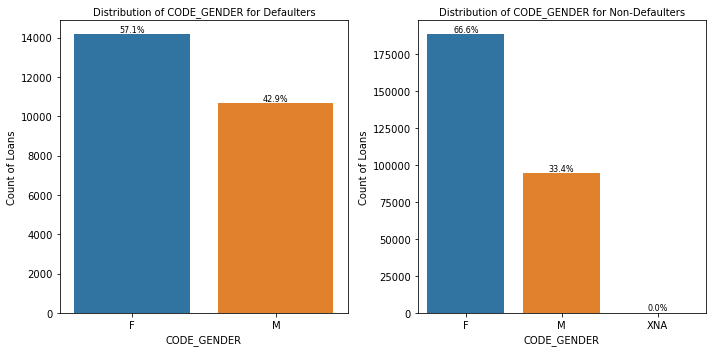

In [24]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout= True )

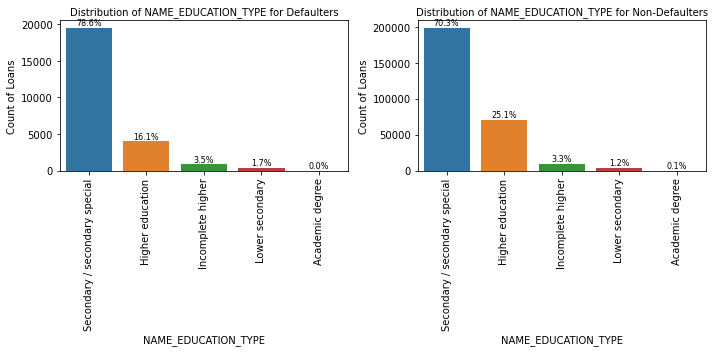

In [25]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

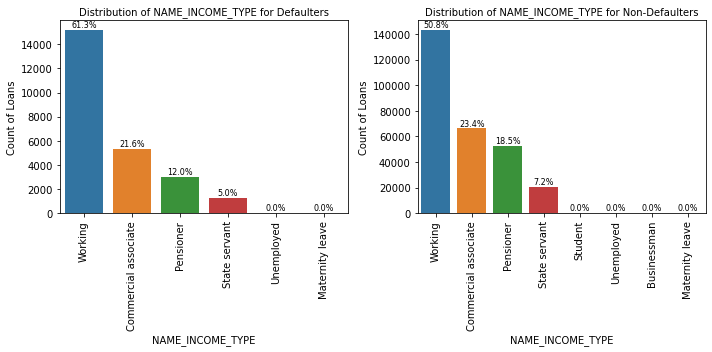

In [26]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

### Checking on the Age

In [27]:
age_data = data1.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = data1.loc[:,'DAYS_BIRTH']/ -365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [28]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


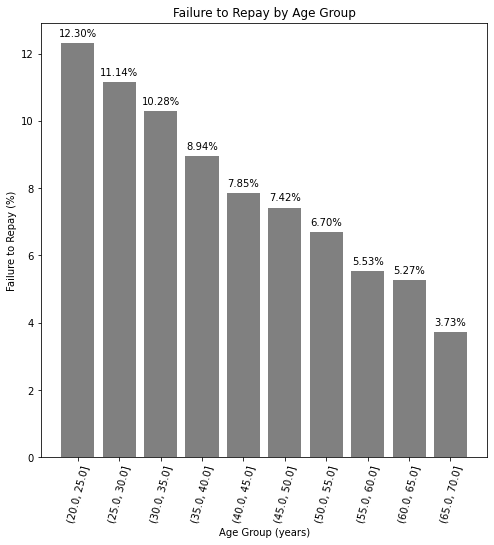

In [54]:
age_data = data1.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = data1.loc[:,'DAYS_BIRTH']/ -365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
bars = plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color = 'grey')

'''
# Adding percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='black',y=yval+2.5)

'''
    # Adding percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+0.15, f'{yval:.2f}%', ha='center', va='bottom', 
             fontsize=10, color='black')

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')
plt.show()
